# RF Example

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#A simple dataset that contains scores for different courses for some students

In [4]:
# load dataset
data = pd.read_csv("iris.csv")
data.shape

(150, 5)

In [5]:
# Import train_test_split function
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classNames = ['Iris-setosa','Iris-versicolor','Iris-virginica']
X=data[features]
y=data['class']

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [17]:
#Create a RandomForestClassifier
NoDTs = 100
clf=RandomForestClassifier(n_estimators=NoDTs, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [18]:
# Model Accuracy, how often is the classifier correct?
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [12]:
#use RF model to predict one sample
toyFlower = [3, 5, 4, 2]
clf.predict([toyFlower])

array(['Iris-versicolor'], dtype=object)

In [19]:
#predict test values and compute score
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9555555555555556


[[12  0  0]
 [ 0 16  2]
 [ 0  0 15]]


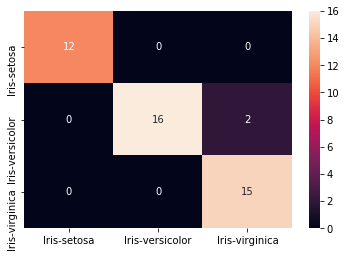

In [20]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
cm = pd.DataFrame(conf_mat, columns=classNames, index=classNames)
sns.heatmap(cm, annot=True)

## Finding Important Features

In [21]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

petal_length    0.461156
petal_width     0.383704
sepal_length    0.136229
sepal_width     0.018911
dtype: float64

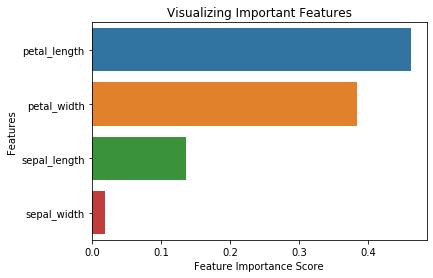

In [22]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Plot Accuracy of each DT from RF model

In [24]:
#initialize a vector to hold counts of trees that gave the same class as in full_predictions. Has the same length as rows in the data

treeScores = []
#move on all decision trees over random forest model
for tree_in_forest in clf.estimators_:
    coindicencias = 0
    #get the index of the class predicted for each tree
    #[0. 0. 1. 1. ... 2. 0. 1]
    dt_prediction=tree_in_forest.predict(X_test)

    #check if predictions are the same with the original class
    for j in range (len(dt_prediction)):
        classPred = classNames[int(dt_prediction[j])]

        if classPred == y_test.values[j]:
            #increment counts for that row
            coindicencias +=1

    treeScores.append(round(coindicencias/j,2))

print(treeScores)

[0.86, 0.98, 0.95, 0.93, 0.93, 0.98, 0.98, 0.95, 0.95, 0.89, 0.98, 0.86, 0.98, 0.93, 0.91, 0.98, 1.0, 0.98, 0.98, 0.93, 0.93, 0.91, 0.95, 0.98, 0.89, 0.98, 0.98, 0.98, 1.0, 0.93, 0.98, 0.98, 0.98, 0.93, 0.91, 0.95, 1.0, 0.98, 0.95, 0.98, 1.0, 0.95, 0.98, 0.98, 0.91, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.95, 0.98, 0.98, 0.95, 0.98, 0.98, 0.91, 0.98, 0.98, 0.95, 0.98, 0.98, 0.98, 0.95, 0.82, 0.95, 0.95, 0.98, 0.98, 0.98, 0.91, 0.95, 0.98, 0.95, 0.98, 0.91, 0.98, 0.89, 0.98, 0.93, 0.95, 0.95, 0.95, 0.98, 0.98, 0.93, 0.98, 1.0, 0.98, 0.98, 1.0, 0.98, 0.95, 0.95, 0.93, 0.93, 0.98, 1.0, 0.89]


Text(0, 0.5, 'Score per Tree')

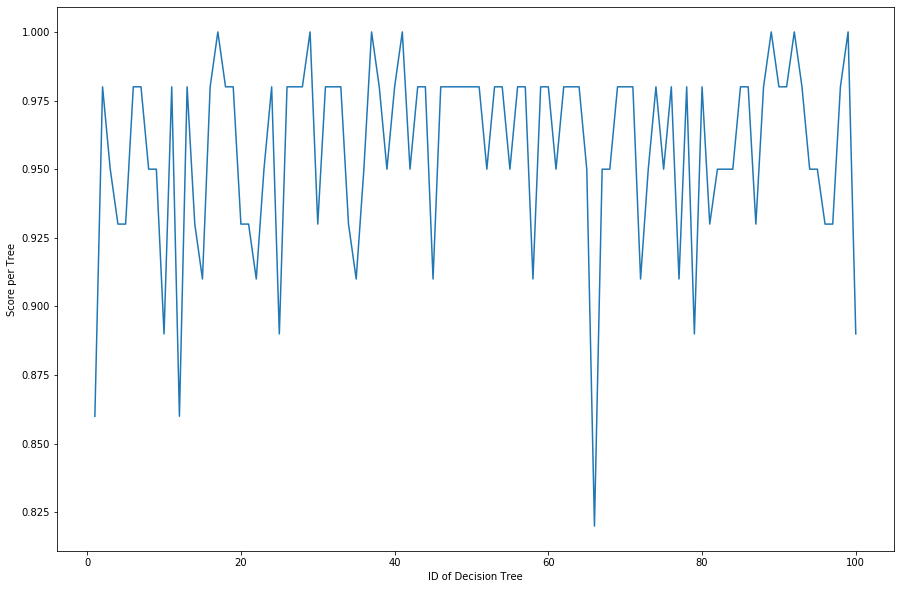

In [25]:
#plt.plot(list(range(1,NoDTs+1)), avg_scores)
x = list(range(1,NoDTs+1))

plt.figure(figsize=(15,10))
plt.plot(x,treeScores)
plt.xlabel("ID of Decision Tree")
plt.ylabel("Score per Tree")